In [1]:
import pandas as pd
import pandas_datareader.data as web
import datetime as dt
import matplotlib.pyplot as plt
import numpy as np
from dateutil.relativedelta import relativedelta

In [2]:
#ESCOLHER PERIODO A SER ANALISADO NO CAMPO years do relativedelta

start = dt.datetime(2017, 5, 1)
end = dt.datetime.now()
#start = end - relativedelta(years=20)

years = (end - start).days / 365.25
stock1 = '^gspc'
stock2 = '^bvsp'

In [3]:
#importando SP500
sp_df = web.get_data_yahoo(stock1, start, end)
sp_df = sp_df.drop(['High','Low','Open','Volume','Adj Close'], axis=1)

In [4]:
#importando IBOV
ibov_df = web.get_data_yahoo(stock2, start, end)
ibov_df = ibov_df.drop(['High','Low','Open','Volume','Adj Close'], axis=1)

In [5]:
#cria coluna retorno e retorno acumulado para IBOV
ibov_df['Ret_ibov'] = ibov_df.Close.pct_change()
ibov_df['Acum_ibov'] = (1 + ibov_df.Ret_ibov).cumprod()
ibov_df.Acum_ibov.iloc[0] = 1

#ibov_df.head()

In [6]:
#calcula retorno final e dd max do IBOV

#retorno final
bench_endreturn = round(((ibov_df.Acum_ibov[-1] / ibov_df.Acum_ibov[0]) - 1) * 100, 2)
#drawdown max
#calculate drawdown
ibov_df['Bench_Peak'] = ibov_df.Acum_ibov.cummax()
ibov_df['Bench_DD'] = ibov_df.Acum_ibov - ibov_df.Bench_Peak
bench_dd = round((((ibov_df.Bench_DD / ibov_df.Bench_Peak).min()) * 100), 2)

# print('Drawdown máximo do IBOV: %s' % bench_dd)
# print('Retorno final do IBOV: %s' % bench_endreturn)

In [7]:
#calcula profit factor do primeiro ativo

#soma valores positivos da coluna de retorno
benchsum_positive = round(ibov_df.Ret_ibov[ibov_df.Ret_ibov > 0].sum(), 2)
#soma valores positivos da coluna de retorno
benchsum_negative = round(ibov_df.Ret_ibov[ibov_df.Ret_ibov < 0].sum() * -1, 2)
#divide um pelo outro
benchprofit_factor = round(benchsum_positive / benchsum_negative, 2)

# print(benchsum_positive)
# print(benchsum_negative)
# print(benchprofit_factor)

In [8]:
#cria coluna retorno e retorno acumulado para SP500
sp_df['Ret_sp'] = sp_df.Close.pct_change()
sp_df['Acum_sp'] = (1 + sp_df.Ret_sp).cumprod()
sp_df.Acum_sp.iloc[0] = 1

#sp_df.head()

In [9]:
#calcula retorno final e dd max do segundo ativo

#retorno final
sp_endreturn = round(((sp_df.Acum_sp[-1] / sp_df.Acum_sp[0]) - 1) * 100, 2)
#drawdown max
#calculate drawdown
sp_df['Bench_Peak'] = sp_df.Acum_sp.cummax()
sp_df['Bench_DD'] = sp_df.Acum_sp - sp_df.Bench_Peak
sp_dd = round((((sp_df.Bench_DD / sp_df.Bench_Peak).min()) * 100), 2)

# print('Drawdown máximo do SP500: %s' % sp_dd)
# print('Retorno final do SP500: %s' % sp_endreturn)

In [10]:
#calcula retorno anualizado CAGR para os dois ativos

#ibov
ibov_cagr = round((((ibov_df.Acum_ibov[-1] / ibov_df.Acum_ibov[0]) ** (1/years))-1) * 100, 2)
#sp500
sp_cagr = round((((sp_df.Acum_sp[-1] / sp_df.Acum_sp[0]) ** (1/years))-1) * 100, 2)

# print(ibov_cagr)
# print(sp_cagr)

In [11]:
#calcula profit factor do segundo ativo

#soma valores positivos da coluna de retorno
spsum_positive = round(sp_df.Ret_sp[sp_df.Ret_sp > 0].sum(), 2)
#soma valores positivos da coluna de retorno
spsum_negative = round(sp_df.Ret_sp[sp_df.Ret_sp< 0].sum() * -1, 2)
#divide um pelo outro
spprofit_factor = round(spsum_positive / spsum_negative, 2)

# print(spsum_positive)
# print(spsum_negative)
# print(spprofit_factor)

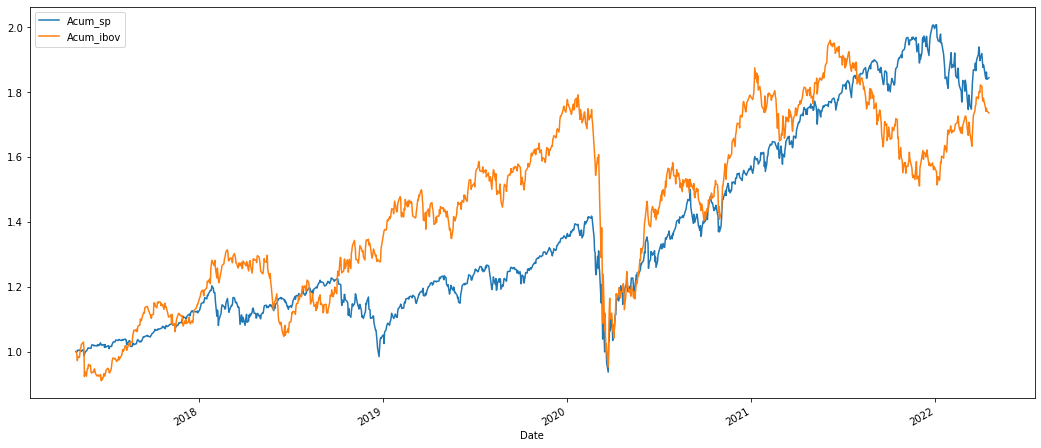

In [12]:
sp_df.Acum_sp.plot(figsize=(18,8))
ibov_df.Acum_ibov.plot(figsize=(18,8))
plt.legend()

In [13]:
#Imprime métricas dos dois ativos

#IBOV
print('Drawdown máximo do IBOV: %s' % bench_dd)
print('Retorno final do IBOV: %s' % bench_endreturn)
print('Profit factor do IBOV: %s' % benchprofit_factor)
print('CAGR do IBOV: %s \n' %ibov_cagr)

#SP500
print('Drawdown máximo do SP500: %s' % sp_dd)
print('Retorno final do SP500: %s' % sp_endreturn)
print('Profit factor do SP500: %s' % spprofit_factor)
print('CAGR do SP500: %s' %sp_cagr)

Drawdown máximo do IBOV: -46.82
Retorno final do IBOV: 73.59
Profit factor do IBOV: 1.11
CAGR do IBOV: 11.75 

Drawdown máximo do SP500: -33.92
Retorno final do SP500: 84.44
Profit factor do SP500: 1.16
CAGR do SP500: 13.13
